# Introduction

###1.1 Background

Due to the fast development of the economy and technology, cars become common in people's daily life. Different people like different types of cars such as sedan, SUV, and so on. Under this condition, people may want to trade in their cars and replace them in a short period to taste other types of the cars. There is some extra fee in purchasing a new car. To save money, they can choose to have a used car. In this case, the price of the car is important. Many factors can influence the price of the car. To understand how each factor may affect the price can help the improvement of the used car industry.

###1.2 Audience

The report is for people who will buy a used car and they can use this report as a reference. They can understand how the dealer decides the price of the user's car and identify whether they have been cheated or not.

###2.1 Data

The used car data can be very important to analyze how the factors affect the price. There are many characters for each car such as the brand, power, vehicle type, and so on. The method that we can use to analyze is the regression and identify the trend of the price depend on different characters.

###2.2 Source of the Data

The data is from the Data World and randomly pick up 500 rows of data to anlysis the result.

### 2.3 Main Purpose
In many of the factors in the table, we emphasize the importance of the numeric data such as the kilometer and power. Beacuse these two are people always care about. In this case, we will talk about how the numeric data influence the price of the used car. We will main discuss about the year, distance and power.

#Analyze the Data

####3.1 Linear Regression

#####3.1.1 Import the data and Fliter it

In [82]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [39]:
used_car = pd.read_csv('https://download.data.world/s/l66pxsxqveeyduacspqkbnp2qcx5xp')
used_car.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-24T10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24T00:00:00,False,66954,2016-04-07T01:46:50
1,2016-03-14T12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14T00:00:00,False,90480,2016-04-05T12:47:46
2,2016-03-31T17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31T00:00:00,False,60437,2016-04-06T10:17:21
3,2016-04-01T20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01T00:00:00,False,67112,2016-04-05T18:18:39
4,2016-04-04T23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04T00:00:00,False,94505,2016-04-04T23:42:13


In [63]:
df = used_car.drop(['seller','offertype','abtest','monthofregistration','notrepaireddamage','model'],axis=1)
df1 = df.drop(['datecrawled','datecreated','nrofpictures','postalcode','lastseen','name'],axis=1)
df1

,price,vehicletype,yearofregistration,gearbox,powerps,kilometer,fueltype,brand
0,18300,coupe,2011,manuell,190,125000,diesel,audi
1,9800,suv,2004,automatik,163,125000,diesel,jeep
2,3600,kleinwagen,2008,manuell,69,90000,diesel,skoda
3,2200,cabrio,2004,manuell,109,150000,benzin,peugeot
4,14500,bus,2014,manuell,125,30000,benzin,ford
...,...,...,...,...,...,...,...,...
495,4800,kleinwagen,2007,manuell,80,100000,benzin,volkswagen
496,5299,kleinwagen,2005,manuell,90,150000,benzin,mini
497,3750,limousine,1991,automatik,234,150000,benzin,jaguar
498,4200,limousine,2000,manuell,163,100000,benzin,mercedes_benz


- Calculate the start used year from now

In [210]:
change_year = []
for change in df1['yearofregistration']:
        change_year.append(2020-change)

print(change_year)

[9, 16, 12, 16, 6, 16, 15, 16, 9, 13, 11, 18, 2, 18, 3, 12, 25, 13, 16, 18, 18, 14, 13, 12, 13, 22, 3, 8, 12, 3, 12, 6, 14, 2, 16, 10, 14, 13, 3, 12, 20, 23, 12, 14, 7, 14, 10, 15, 15, 11, 16, 7, 17, 7, 12, 8, 16, 21, 11, 14, 15, 18, 29, 14, 24, 10, 17, 19, 19, 8, 24, 13, 15, 17, 13, 20, 10, 6, 17, 20, 17, 11, 16, 3, 17, 13, 13, 16, 9, 20, 14, 14, 14, 8, 20, 5, 4, 9, 11, 17, 13, 12, 52, 28, 12, 14, 14, 9, 2, 14, 14, 12, 9, 11, 10, 10, 13, 13, 29, 15, 12, 15, 16, 16, 20, 7, 15, 9, 14, 20, 14, 12, 8, 14, 18, 8, 11, 10, 16, 11, 13, 17, 7, 21, 5, 6, 11, 11, 11, 16, 22, 9, 19, 19, 3, 25, 8, 11, 8, 11, 31, 9, 20, 16, 16, 4, 24, 16, 12, 17, 16, 18, 18, 14, 14, 23, 12, 13, 16, 3, 7, 11, 21, 6, 22, 12, 11, 14, 10, 16, 6, 12, 17, 10, 7, 19, 14, 14, 19, 8, 16, 8, 6, 17, 37, 13, 12, 17, 14, 14, 8, 20, 16, 13, 13, 15, 10, 17, 11, 16, 13, 12, 8, 7, 22, 4, 21, 10, 10, 19, 11, 13, 9, 28, 16, 12, 61, 9, 18, 10, 13, 19, 16, 14, 19, 10, 13, 16, 10, 13, 17, 11, 17, 17, 11, 7, 17, 23, 15, 13, 18, 11, 12, 7

In [216]:
df2 = pd.DataFrame(change_year)
df2.columns = ['year_of_used']
df2.head()

,year_of_used
0,9
1,16
2,12
3,16
4,6


In [217]:
df_final=pd.concat([df1, df2], axis=1)
df_final.head()

,price,vehicletype,yearofregistration,gearbox,powerps,kilometer,fueltype,brand,year_of_used
0,18300,coupe,2011,manuell,190,125000,diesel,audi,9
1,9800,suv,2004,automatik,163,125000,diesel,jeep,16
2,3600,kleinwagen,2008,manuell,69,90000,diesel,skoda,12
3,2200,cabrio,2004,manuell,109,150000,benzin,peugeot,16
4,14500,bus,2014,manuell,125,30000,benzin,ford,6


####3.1.2 Relationship between Price and kilometer

In [66]:
x = np.array(df1['kilometer']).reshape(-1,1)
y = np.array(df1['price'])


In [70]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.16194752],
       [ 0.16194752],
       [-0.68027582],
       [ 0.76353561],
       [-2.12408725]])

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 1) (400,)
Test set: (100, 1) (100,)


In [ ]:
import matplotlib.pyplot as plt
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

prediction = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)

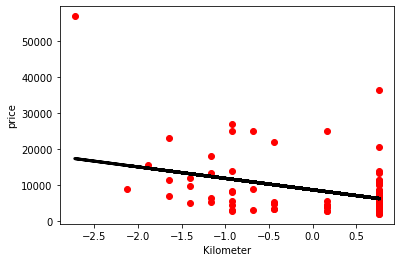

In [101]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, prediction, color='black', linewidth=3)

plt.ylabel('price')
plt.xlabel('Kilometer')

plt.show()

Use the regression model in this case, it show us that the price will go down when the kilometer of the car goes up.

#### 3.1.3 Relationship between Price and Power

In [139]:
x1 = np.array(df1['powerps']).reshape(-1,1)
y1 = np.array(df1['price'])

In [140]:
from sklearn import preprocessing
x1 = preprocessing.StandardScaler().fit(x1).transform(x1)
x1[0:5]

array([[ 0.69008103],
       [ 0.26853832],
       [-1.19905483],
       [-0.57454711],
       [-0.32474402]])

In [141]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split( x1, y1, test_size=0.2, random_state=4)
print ('Train set:', X1_train.shape,  y1_train.shape)
print ('Test set:', X1_test.shape,  y1_test.shape)

Train set: (400, 1) (400,)
Test set: (100, 1) (100,)


In [142]:
import matplotlib.pyplot as plt
reg = linear_model.LinearRegression()
reg.fit(X1_train,y1_train)

pred = reg.predict(X1_test)
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [4023.17713911]


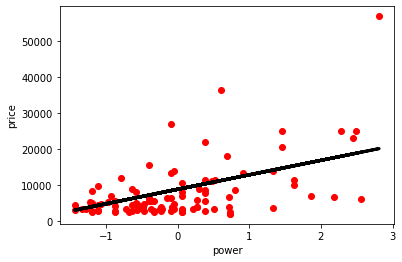

In [124]:
plt.scatter(X1_test, y1_test,  color='red')
plt.plot(X1_test, pred, color='black', linewidth=3)

plt.ylabel('price')
plt.xlabel('power')

plt.show()

Use the regression model in this case, it show us that the price will go up when the power of the car goes up.

####3.1.4 Relationship between Price and Year of Used

In [231]:
a = np.array(df_final['year_of_used']).reshape(-1,1)
b = np.array(df_final['price'])

In [232]:
from sklearn import preprocessing
a = preprocessing.StandardScaler().fit(a).transform(a)
a[0:5]

array([[-0.7780362 ],
       [ 0.27866799],
       [-0.32516297],
       [ 0.27866799],
       [-1.23090942]])

In [242]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split( a, b, test_size=0.2, random_state=4)
print ('Train set:', a_train.shape,  b_train.shape)
print ('Test set:', a_test.shape,  b_test.shape)

Train set: (400, 1) (400,)
Test set: (100, 1) (100,)


In [243]:
import matplotlib.pyplot as plt
re = linear_model.LinearRegression()
re.fit(a_train,b_train)

pr = re.predict(a_test)
print('Coefficients: \n', re.coef_)

Coefficients: 
 [-570.38724415]


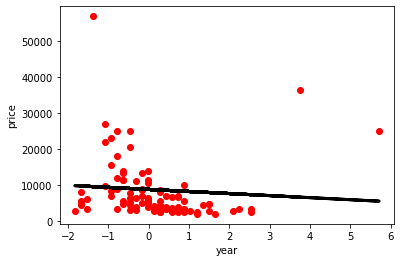

In [244]:
plt.scatter(a_test, b_test,  color='red')
plt.plot(a_test, pr, color='black', linewidth=3)

plt.ylabel('price')
plt.xlabel('year')

plt.show()

This show that the price will go down slow if the car used too long. However, this is a weak relationship since the curve is trend to flat and it is not obvious to say so.

---

###3.2 Multiple Regression

In [174]:
X = np.array(df1[['powerps','kilometer']])
Y = np.array(df1['price'])

In [191]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x1).transform(x1)
X[0:5]

array([[ 0.69008103],
       [ 0.26853832],
       [-1.19905483],
       [-0.57454711],
       [-0.32474402]])

In [201]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split( X, Y, test_size=0.3, random_state=3)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (350, 1) (350,)
Test set: (150, 1) (150,)


In [202]:
import matplotlib.pyplot as plt
regress = linear_model.LinearRegression()
regress.fit(X2_train,y2_train)

pre = regress.predict(X2_test)
print('Coefficients: \n', regress.coef_)

Coefficients: 
 [3885.0257726]


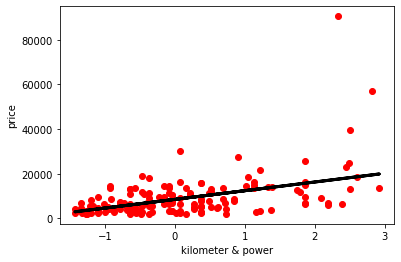

In [203]:
plt.scatter(X2_test, y2_test,  color='red')
plt.plot(X2_test, pre, color='black', linewidth=3)

plt.ylabel('price')
plt.xlabel('kilometer & power')

plt.show()

As we can see that when kilometer and power go up together, the price will increase with them. 

---

#Conculsion

1.The price of the car will go down when the kilometer of the car goes up.

2.The price will go up if the car have a stronger power.

3.The price will go down slow if the car used too long.

4.When kilometer and power go up together, the price will increase with them. 